In [1]:
from dimension_magic import load_emg_data,get_glove_data,fast_ica_analysis,pca_analysis
from PlotUtility import plot_multi_channel
from MyKinPro import MyKinPro
from MyKinAda import MyKinAda
import matplotlib.pyplot as plt
from signal_utilities import calculate_power_of_signal,gaussian_filter_signal,custom_norm,lowpass_fiter_signals,find_baseline_peakutil
import numpy as np

In [2]:
emg = load_emg_data()
emg = pca_analysis(emg.T)
emg_ica = fast_ica_analysis(emg)
emg_power = custom_norm(emg_ica)
emg_ica_power = gaussian_filter_signal(emg_ica)

first 9 principle components catpures 95 percent of all variances


In [3]:
# plot_multi_channel(emg_ica_power)

In [4]:
glove = get_glove_data()
glove = custom_norm(glove)
glove = glove[:emg_ica_power.shape[0]]
fingers = glove[:,[4,7,11,15]]
fingers_power = calculate_power_of_signal(fingers)
fingers_power = custom_norm(fingers_power)

In [5]:
# plot_multi_channel(fingers)

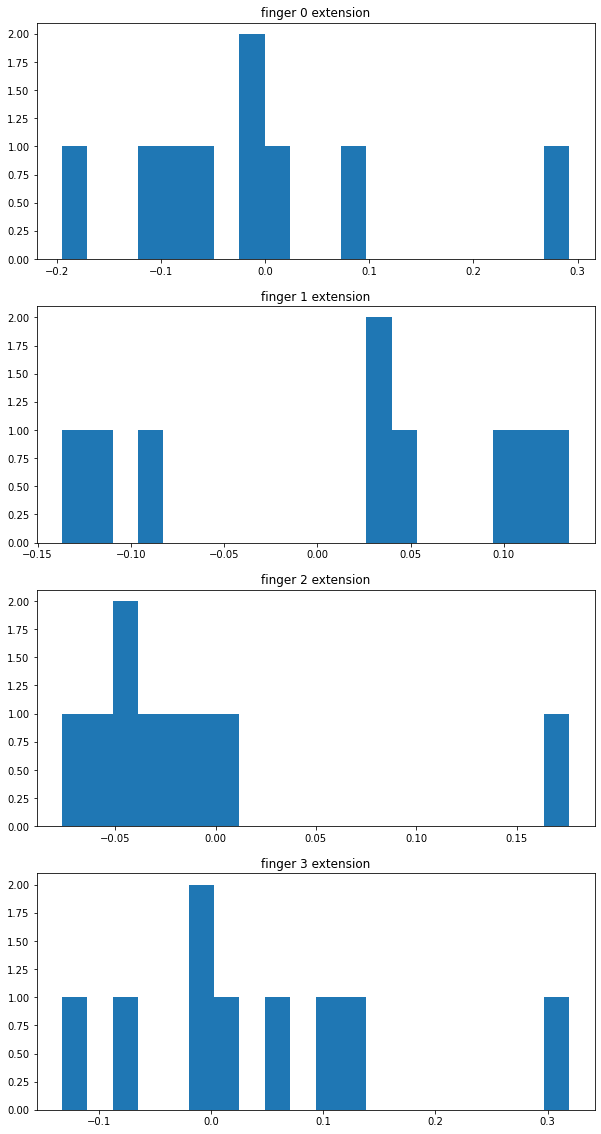

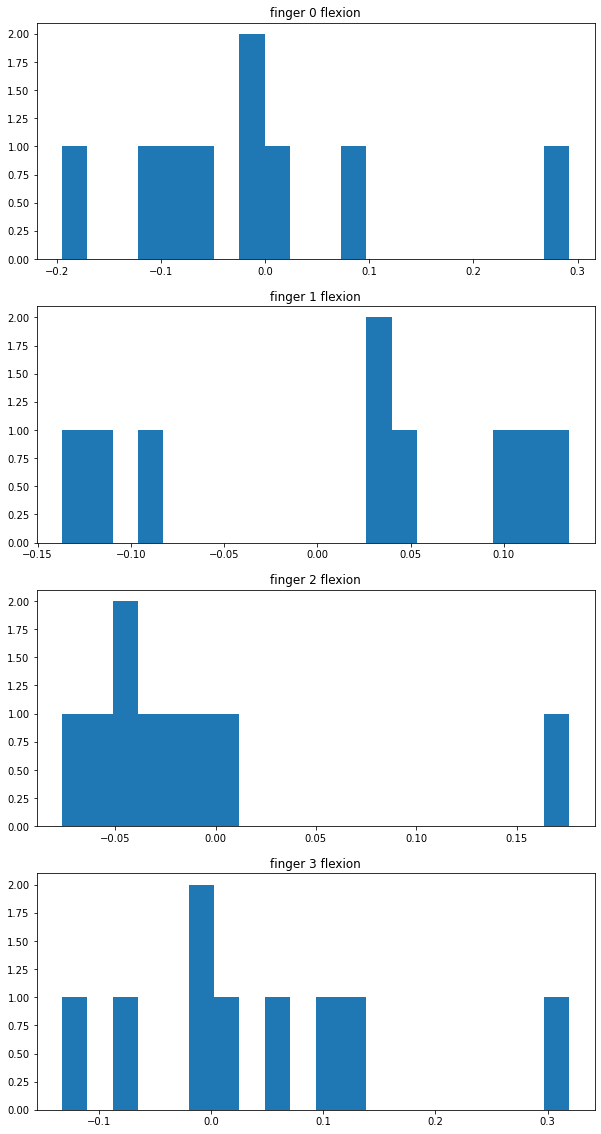

In [6]:
fitter = MyKinAda(fingers,emg_ica_power)
fitter.plot_correlation_coefficient_histogram_for_each_joint()

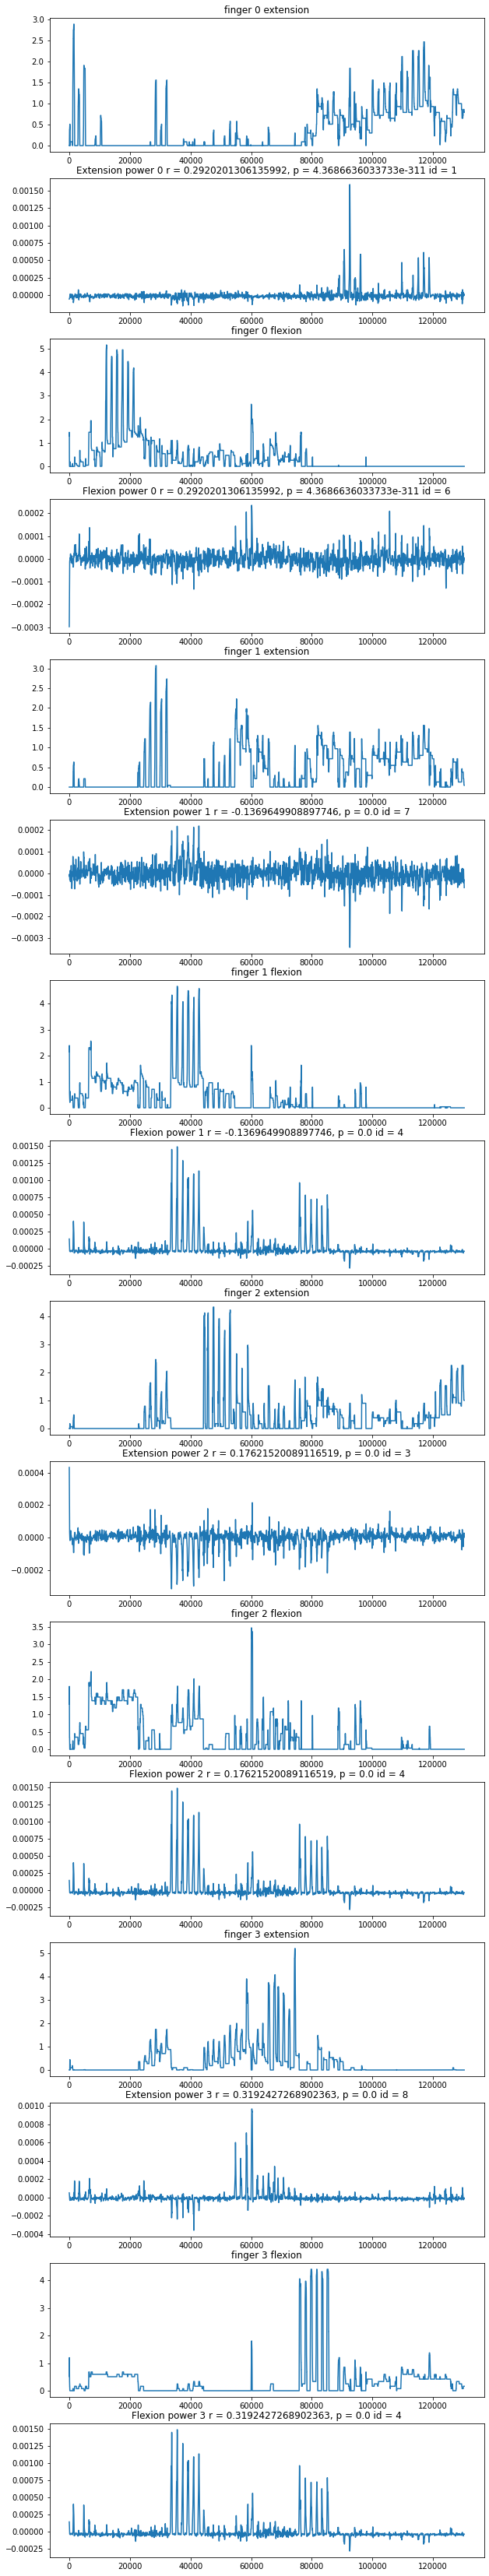

In [7]:
fitter.plot_best_fit_channels()

In [8]:
fitter.fit_mykin_model(stepsize = 1e-2,fudge_factor = 1e-6,max_it=1000,minibatchsize=None,minibatch_ratio=0.01)
fitter.show_model_fit()

optimizing finger 0
